In [46]:
import os, warnings
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

In [47]:
df=pd.read_csv('pulsar_data_train.csv')
df.shape

(12528, 9)

In [48]:
df.head()

Mean of the integrated profile  \
0                       121.156250   
1                        76.968750   
2                       130.585938   
3                       156.398438   
4                        84.804688   

    Standard deviation of the integrated profile  \
0                                      48.372971   
1                                      36.175557   
2                                      53.229534   
3                                      48.865942   
4                                      36.117659   

    Excess kurtosis of the integrated profile  \
0                                    0.375485   
1                                    0.712898   
2                                    0.133408   
3                                   -0.215989   
4                                    0.825013   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.013165                   3.168896   
1                             3.388719                   2.399666   
2                            -0.297242                   2.743311   
3                            -0.171294                  17.471572   
4                             3.274125                   2.790134   

    Standard deviation of the DM-SNR curve  \
0                                18.399367   
1                                17.570997   
2                                22.362553   
3                                      NaN   
4                                20.618009   

    Excess kurtosis of the DM-SNR curve   Skewness of the DM-SNR curve  \
0                              7.449874                      65.159298   
1                              9.414652                     102.722975   
2                              8.508364                      74.031324   
3                              2.958066                       7.197842   
4                              8.405008                      76.291128   

   target_class  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [49]:
# view the column names of the dataframe

col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

## We can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, I will remove these leading spaces.

In [50]:
df.columns=df.columns.str.lstrip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

## Rename columns to make it shorter

In [51]:
# rename column names

df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [52]:
# check distribution of target_class column

df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [53]:
# view the percentage distribution of target_class column

df['target_class'].value_counts(normalize=True)*100

0.0    90.796616
1.0     9.203384
Name: target_class, dtype: float64

## We can see that percentage of observations of the class label 0 and 1 is 90.84% and 9.16%. So, this is a class imbalanced problem. I will deal with that in later section.

In [54]:
# view summary of dataset

df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

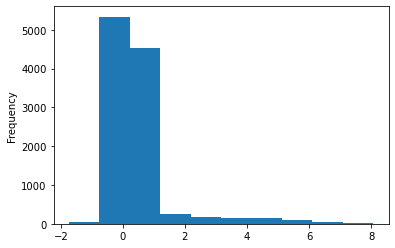

In [55]:
df['IP Kurtosis'].plot.hist()
## we can replace with mode value


In [56]:
df['IP Kurtosis']=df['IP Kurtosis'].fillna(method='ffill')

In [57]:
df['IP Kurtosis'].isnull().sum()

0

<AxesSubplot:ylabel='Frequency'>

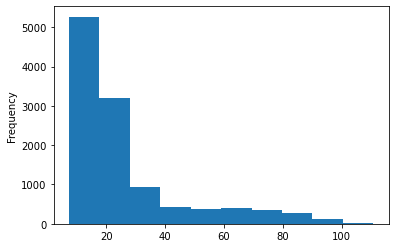

In [58]:
df['DM-SNR Sd'].plot.hist()

In [59]:
df['DM-SNR Sd'].mode()[0]

7.370432165

In [60]:
df['DM-SNR Sd']=df['DM-SNR Sd'].fillna(method='ffill')

<AxesSubplot:ylabel='Frequency'>

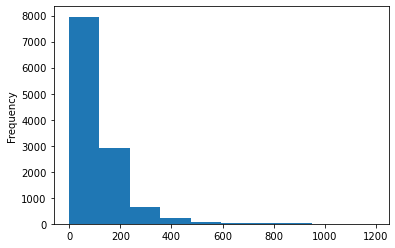

In [61]:
df['DM-SNR Skewness'].plot.hist()


In [62]:
df['DM-SNR Skewness']=df['DM-SNR Skewness'].fillna(method='ffill')


In [63]:
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

## Look for outliers

In [64]:
# view summary statistics in numerical variables

round(df.describe(),2).T

count    mean     std    min     25%     50%     75%  \
IP Mean          12528.0  111.04   25.67   5.81  100.87  115.18  127.11   
IP Sd            12528.0   46.52    6.80  24.77   42.36   46.93   50.98   
IP Kurtosis      12528.0    0.48    1.06  -1.74    0.03    0.22    0.47   
IP Skewness      12528.0    1.78    6.21  -1.79   -0.19    0.20    0.93   
DM-SNR Mean      12528.0   12.67   29.61   0.21    1.91    2.79    5.41   
DM-SNR Sd        12528.0   26.40   19.70   7.37   14.42   18.42   28.34   
DM-SNR Kurtosis  12528.0    8.33    4.54  -3.14    5.80    8.45   10.73   
DM-SNR Skewness  12528.0  105.77  107.96  -1.98   35.04   83.18  140.07   
target_class     12528.0    0.09    0.29   0.00    0.00    0.00    0.00   

                     max  
IP Mean           189.73  
IP Sd              91.81  
IP Kurtosis         8.07  
IP Skewness        68.10  
DM-SNR Mean       222.42  
DM-SNR Sd         110.64  
DM-SNR Kurtosis    34.54  
DM-SNR Skewness  1191.00  
target_class        1.00

In [71]:
fig = make_subplots(rows=3, cols=3,subplot_titles=(df.columns))
cnt =0
for item in df.columns:
    fig.add_trace(go.Box(x=df[item]), row=(cnt//3) + 1, col=(cnt%3)+1)
    cnt+=1

fig.update_layout(height=600, width=1000, showlegend=False)
fig.show()

## Histogram plot

In [72]:
fig = make_subplots(rows=3, cols=3,subplot_titles=(df.columns))
cnt =0
for item in df.columns:
    #fig.add_trace(go.Line(x=df.date,y=df.num_sold), row=(cnt//2) + 1, col=(cnt%2)+1)
    fig.add_trace(go.Histogram(x=df[item]), row=(cnt//3) + 1, col=(cnt%3)+1)
    cnt+=1

fig.update_layout(height=500, width=1000, showlegend=False, title_text="Histogram of the Features")
fig.show()

## Input and Output split

In [73]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

## Split data into separate training and test set

In [74]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [75]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((10022, 8), (2506, 8))

## 11. Feature Scaling 

In [76]:
cols = X_train.columns

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [80]:
X_test

array([[ 0.2290664 ,  0.61160004, -0.37854324, ..., -0.83929492,
         2.0022678 ,  2.62432898],
       [ 0.50368785, -0.03569584, -0.23304236, ...,  0.06331323,
        -0.70880367, -0.72362044],
       [ 1.36889632,  3.26356477, -0.3170243 , ...,  2.86772972,
        -1.96905883, -0.85479732],
       ...,
       [-0.32078007,  0.92117186,  0.08718417, ...,  2.46957726,
        -2.09268803, -0.97836248],
       [ 1.05594858,  0.96891008, -0.42809675, ..., -0.36182534,
         0.40055922,  0.04328441],
       [ 0.13913542,  0.59298007, -0.27242845, ..., -0.63308156,
         0.82709086,  0.63445684]])

In [78]:
X_train = pd.DataFrame(X_train, columns=[cols])

# Since it is in array convert to dataframe

In [79]:
X_train

IP Mean     IP Sd IP Kurtosis IP Skewness DM-SNR Mean DM-SNR Sd  \
0      1.112382 -0.651835   -0.650025   -0.247974   -0.235784 -0.109857   
1     -0.826265 -1.104939   -0.034925   -0.041667   -0.404186 -0.825135   
2     -0.464730  0.245287   -0.063678   -0.222887   -0.379589 -0.420244   
3      0.801547  0.550944   -0.442086   -0.274269   -0.422521 -0.965500   
4     -0.404374 -0.042093    0.079597   -0.208137   -0.327771 -0.390768   
...         ...       ...         ...         ...         ...       ...   
10017  0.720065  0.410654   -0.408617   -0.336014   -0.349745 -0.321577   
10018 -0.343414 -0.066622   -0.009912   -0.218004   -0.367600 -0.607449   
10019 -1.254493 -1.968491    1.468318    1.231358   -0.362156 -0.340196   
10020  0.599051  0.405504   -0.500727   -0.299053   -0.297927 -0.144304   
10021 -0.107722  1.300717   -0.279608   -0.327460   -0.229522  0.133096   

      DM-SNR Kurtosis DM-SNR Skewness  
0           -0.712771       -0.708554  
1            2.158752        2.578818  
2            0.851468        0.386256  
3            5.769814       10.013011  
4           -0.052073       -0.260074  
...               ...             ...  
10017        0.210858       -0.139974  
10018        0.564912        0.316528  
10019        0.510791        0.094597  
10020       -0.299844       -0.495727  
10021       -0.544763       -0.624708  

[10022 rows x 8 columns]

In [81]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [82]:
X_train.describe()

IP Mean         IP Sd   IP Kurtosis   IP Skewness   DM-SNR Mean  \
count  1.002200e+04  1.002200e+04  1.002200e+04  1.002200e+04  1.002200e+04   
mean  -2.580698e-16 -7.770453e-16 -1.524313e-17 -1.595212e-17 -3.030902e-17   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min   -4.059253e+00 -3.121855e+00 -2.073026e+00 -5.703669e-01 -4.225211e-01   
25%   -3.943394e-01 -6.101706e-01 -4.261975e-01 -3.175801e-01 -3.653436e-01   
50%    1.619199e-01  5.986146e-02 -2.407900e-01 -2.549120e-01 -3.355278e-01   
75%    6.265131e-01  6.579129e-01 -1.037125e-02 -1.397269e-01 -2.459675e-01   
max    3.045294e+00  6.647182e+00  7.079388e+00  1.045442e+01  7.074053e+00   

          DM-SNR Sd DM-SNR Kurtosis DM-SNR Skewness  
count  1.002200e+04    1.002200e+04    1.002200e+04  
mean   1.272624e-16   -1.318708e-16   -2.765034e-17  
std    1.000050e+00    1.000050e+00    1.000050e+00  
min   -9.655000e-01   -2.526379e+00   -9.953965e-01  
25%   -6.088729e-01   -5.589324e-01   -6.565096e-01  
50%   -4.070945e-01    2.442155e-02   -2.096606e-01  
75%    9.941137e-02    5.276848e-01    3.147268e-01  
max    4.257076e+00    5.769814e+00    1.001301e+01

## 12. Run SVM with default hyperparameters

## Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

In [85]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [86]:
# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)



SVC()

In [87]:
# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9785


## Run SVM with rbf kernel and C=100.0
## We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. So, I will run SVM with kernel=rbf and C=100.0.

In [88]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9792


In [89]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9777


## 13. Run SVM with linear kernel

In [90]:
 #instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9737


In [91]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9741


In [92]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9741


## check for overfitting

In [93]:
y_pred_train = linear_svc.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 0.9739


In [94]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9739
Test set score: 0.9737


## Compare model accuracy with null accuracy.So, the model accuracy is 0.9832. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.



In [96]:
# check class distribution in test set

y_test.value_counts(normalize=True)*100

0.0    91.181165
1.0     8.818835
Name: target_class, dtype: float64

## 14. Run SVM with polynomial kernel

In [98]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9749


In [100]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=poly_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=100.0 : 0.9777


## 15. Run SVM with sigmoid kernel 

In [101]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.8751


### Comments


We get maximum accuracy with `rbf` and `linear` kernel with C=100.0.  Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, this is not true. Here, we have an imbalanced dataset. The problem is that accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem.


So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making. 


One such metric to analyze the model performance in imbalanced classes problem is `Confusion matrix`.`m

# **Confusion matrix** <a class="anchor" id="16"></a>




A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.

In [103]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[2279    6]
 [  60  161]]

True Positives(TP) =  2279

True Negatives(TN) =  161

False Positives(FP) =  6

False Negatives(FN) =  60


<AxesSubplot:>

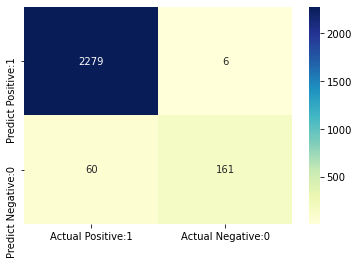

In [104]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 17. Classification metrices

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      2285
         1.0       0.96      0.73      0.83       221

    accuracy                           0.97      2506
   macro avg       0.97      0.86      0.91      2506
weighted avg       0.97      0.97      0.97      2506



In [106]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [107]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9737


In [108]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9974


In [109]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9743


# **19. Stratified k-fold Cross Validation with shuffle split** <a class="anchor" id="19"></a>




k-fold cross-validation is a very useful technique to evaluate model performance. But, it fails here because we have a imbalnced dataset. So, in the case of imbalanced dataset, I will use another technique to evaluate model performance. It is called `stratified k-fold cross-validation`.


In `stratified k-fold cross-validation`, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.


Moreover, I will shuffle the data before splitting because shuffling yields much better result.

In [114]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold=KFold(n_splits=5, shuffle=True, random_state=0)


linear_svc=SVC(kernel='linear')


linear_scores = cross_val_score(linear_svc, X, y, cv=kfold)



In [115]:
# print cross-validation scores with linear kernel

print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))

print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))

Stratified cross-validation scores with linear kernel:

[0.97406225 0.97685555 0.97286512 0.9744511  0.9740519 ]
Average stratified cross-validation score with linear kernel:0.9745


In [118]:
rbf_svc=SVC(kernel='rbf')


rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)
print('Average stratified cross-validation score with rbf kernel:{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf kernel:0.9708


# **20. Hyperparameter Optimization using GridSearch CV** <a class="anchor" id="20"></a>


In [120]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV


# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc=SVC() 



# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]




grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                    0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [121]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.9796


In [122]:
# examine the best model


# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))


# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))


# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.9775


Parameters that give the best results : 

 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


Estimator that was chosen by the search : 

 SVC(C=10, gamma=0.1)
